In [774]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy
import statsmodels.api as sm
from sklearn import linear_model



In [775]:

vel_files = glob.glob("rec_lattice_bounds/sim_data/pop*.txt")

In [776]:

K_var = [10000,20000,50000,100000]
K_str = ['K'+str(K)+"_" for K in K_var]


B_var = [0,2.5,3.5,6,10]

B_str = ['B'+str(B)+"_" for B in B_var]

In [777]:
df= pd.DataFrame(columns = ['K','B','D'])

In [778]:
buff = [[200,300,400,500],[200,300,400,500],[200,300,400,500],[200,300,400,500]]

results = np.zeros((len(B_var),len(K_var),100,500,2))
for Kn, Ki,K in zip(range(len(K_var)),K_var,K_str):
    for Bn,Bi,B in zip(range(len(B_var)),B_var,B_str):
        sub_files = []
        
        for f in vel_files:
            if (K in f) and (B in f):
                sub_files.append(f)
                
        for i,f in enumerate(sub_files):
            results[Bn,Kn,i] = np.loadtxt(f,delimiter=", ")
            
            
            
            
            
            
            
        vel_fit = curve_fit(lambda t,a,D: 2*D*t + a,  
                    np.mean(results[Bn,Kn,:,100:300,0],axis=0), np.std(results[Bn,Kn,:,100:300,1],axis=0)**2,
                     absolute_sigma=True)
        
        
        df = df.append(pd.DataFrame(data=[[Ki,Bi, vel_fit[0][1]]], columns = ['K','B','D'] ))
                
                
                
        

In [779]:
df[['K']]=df[['K']].astype(int)
df[df.columns[1:]]= df[df.columns[1:]].astype(float)

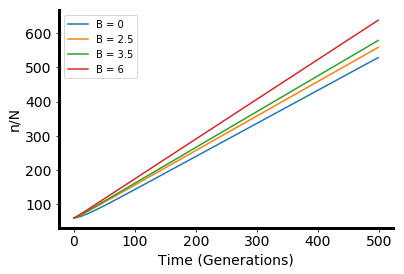

In [780]:
fig,ax= plt.subplots()

for i in range(4):
    ax.plot(np.mean(results[i,0,:,:,1],axis=0),label= 'B = ' +str(B_var[i]))
    
ax.set_xlabel('Time (Generations)', fontsize=14)
ax.set_ylabel('n/N', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)


ax.legend()
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

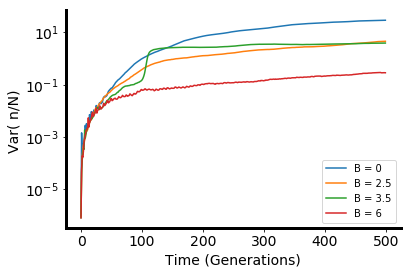

In [781]:
fig,ax= plt.subplots()

for i in range(4):
    ax.plot(np.std(results[i,0,:,:,1],axis=0)**2,label= 'B = ' +str(B_var[i]))
    
ax.set_xlabel('Time (Generations)', fontsize=14)
ax.set_ylabel('Var( n/N) ', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)

ax.set_yscale('log')
ax.legend()
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

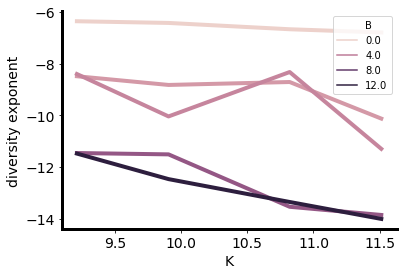

In [782]:
fig,ax= plt.subplots()
sns.lineplot(x= np.log(df['K']),y=np.log(df['D']), data=df,hue='B',ax=ax,lw=4)
ax.set_xlabel('K', fontsize=14)
ax.set_ylabel('diversity exponent', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


In [783]:
font=[]
for B in df['B'].unique():
    df_reg = df.loc[df['B']==B,:]
    x = np.log(df.loc[df['B']==B,['K']])
    y = np.log(df.loc[df['B']==B,'D'])
    lm = linear_model.LinearRegression()
    model = lm.fit(x,y)

    # Print out the statistics
    font.append(model.coef_[0])
    
    

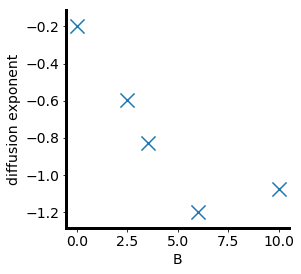

In [785]:
fix,ax=plt.subplots(figsize=(4,4))
ax.scatter(df['B'].unique(),font,marker='x',s=200)
ax.set_xlabel('B', fontsize=14)
ax.set_ylabel('diffusion exponent', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


In [658]:
#plt.plot(np.std(results[0,2,:,:,1],axis=0)**2 / np.mean(np.std(results[0,2,:,:,1],axis=0)**2 ))
#plt.plot(np.std(results[1,2,:,:,1],axis=0)**2/np.mean(np.std(results[1,2,:,:,1],axis=0)**2) )

results[2,2,:,100:,1]




array([[161.108, 162.147, 163.19 , ..., 576.181, 577.227, 578.27 ],
       [161.119, 162.126, 163.163, ..., 575.91 , 576.955, 578.072],
       [161.095, 162.101, 163.141, ..., 576.122, 577.16 , 578.205],
       ...,
       [161.196, 162.236, 163.277, ..., 576.381, 577.425, 578.468],
       [161.129, 162.166, 163.209, ..., 576.092, 577.103, 578.141],
       [161.074, 162.117, 163.125, ..., 575.94 , 576.986, 578.098]])

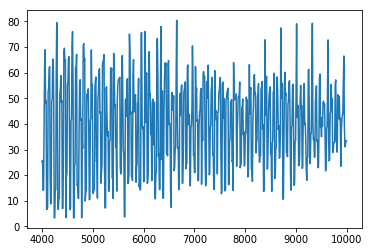

In [66]:
plt.plot(np.mean(results[Bn,Kn,:,400:,0],axis=0), np.std(results[Bn,Kn,:,400:,1],axis=0)**2)

In [67]:
vel_fit = curve_fit(lambda t,a,D: 2*D*t + a,  
                    np.mean(results[0,-1,:,400:,0],axis=0), np.std(results[0,-1,:,400:,1],axis=0)**2,
                     absolute_sigma=True)

In [70]:
vel_fit[0][1]

8.581062494107272e-05